<a href="https://colab.research.google.com/github/Natasha-70/PRODIGY_DS-/blob/main/PRODIGY_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk



In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# STEP 3: Load both datasets
train_path ="/content/drive/MyDrive/twitter_training.csv"
valid_path ="/content/drive/MyDrive/twitter_validation.csv"

In [4]:
df_train = pd.read_csv(train_path, header=None)
df_valid = pd.read_csv(valid_path, header=None)

In [5]:
# Check shape and sample
print("Train shape:", df_train.shape)
print("Validation shape:", df_valid.shape)

Train shape: (74682, 4)
Validation shape: (1000, 4)


In [6]:
# STEP 4: Rename columns if they have no headers (assumes 3rd column is the tweet t
df_train.columns = ['id', 'label', 'text', 'sentiment']
df_valid.columns = ['id', 'label', 'text', 'sentiment']

In [7]:
# Combine both
df = pd.concat([df_train[['text']], df_valid[['text']]], ignore_index=True)
df.dropna(inplace=True)  # Remove empty tweets


In [10]:
# STEP 5: Apply sentiment analysis
def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['text'].apply(get_sentiment)

In [11]:
# STEP 6: Display sentiment counts and plot
print(df['sentiment'].value_counts())

sentiment
Neutral     31765
Negative    22808
Positive    21109
Name: count, dtype: int64


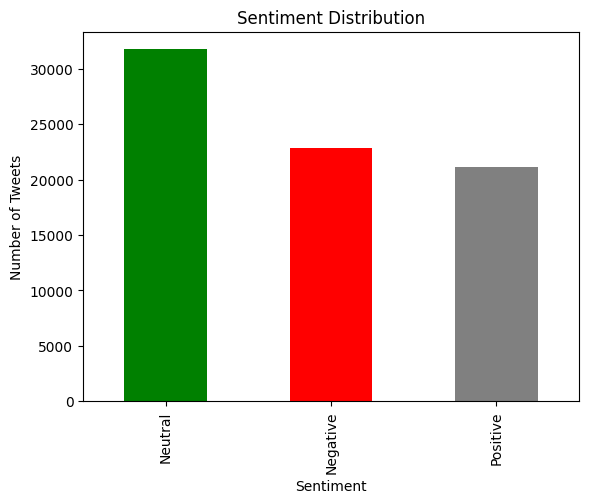

In [12]:
# Plot the sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()